<a href="https://colab.research.google.com/github/PaulToronto/Learning_Manim/blob/main/02_Tutorials_Manims_Building_Blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manim's Building Blocks

https://docs.manim.community/en/stable/tutorials/building_blocks.html

In [1]:
# 1. Install System Dependencies (Includes LaTeX for MathTex)
!sudo apt update
!sudo apt install libcairo2-dev \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev ffmpeg

# 2. Install Manim and specific IPython version for stability
!pip install manim IPython==8.21.0

# 3. Restart kernel (Run this once, then comment it out)
# exit()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
63 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree

## Imports

In [2]:
from manim import *
import numpy as np

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


## `Mobject`: `manim.mobject.mobject.Mobject`

- `Mobject` is the base class of all objects that can be displayed
- Bases: `object`
- Every `Mobject` has a `points` attribute, wich is a NumPy array. Even an "empty" one has a location in $\mathbb{R}^{3}$
- The `points` Numpy array has 3 columns, (x, y, z) and a row for each point
- `get_center()`
    - In Manim, the **center** is the geometric center of the **Bounding Box** that encloses all the points in the mobject

$$C = \left( \frac{x_{max} + x_{min}}{2}, \frac{y_{max} + y_{min}}{2}, \frac{z_{max} + z_{min}}{2} \right)$$

- You can apply `.shift()`, `rotate()` and `scale()` to it. It will update it's internal coordinate matrix even if there is nothing visual to move.
- `Mobject`: It only manages a NumPy array of points. It is essentially a mathematical data structure. It doesn't have a "stroke width" or a "fill color" because it doesn't know what it is supposed to be.
- `VMobject` (Vector Mobject): This is the class that actually "paints." It takes those points and tells the computer: "Draw a Bézier curve between these coordinates using a specific thickness and color."

In [28]:
%%manim -ql -v WARNING TestMobject

class TestMobject(Scene):
    def construct(self):
        self.add(NumberPlane())

        # Create invisible Mobject and a visible dot to track it
        # Note that it needs `points` to be able to calculate the center
        my_Mobject = Mobject().set(points=np.array([ORIGIN]))
        dot = Dot(color=RED)

        # Link the dot to the Mobject's position
        dot.add_updater(lambda d: d.move_to(my_Mobject.get_center()))


        self.add(my_Mobject, dot)

        # Print the center BEFORE the shift
        print(f"Before: {my_Mobject.get_center()}")
        self.wait(3)

        # move my_Mobject
        my_Mobject.shift(RIGHT * 3 + UP * 2)
        # a hack to get the .add_updater() to work
        dot.update()

        # Print the center AFTER the shift
        print(f"After: {my_Mobject.get_center()}")
        self.wait(3)


Manim Community v0.19.2

Before: [0. 0. 0.]
After: [3. 2. 0.]


In [49]:
%%manim -ql -v WARNING TestMobject2

class TestMobject2(Scene):
    def construct(self):
        self.add(NumberPlane())

        # the Math Object is the source of truth
        my_Mobject = Mobject().set(points=np.array([ORIGIN]))

        # the Dot is the visual follower
        dot = Dot(color=RED)
        dot.add_updater(lambda d: d.move_to(my_Mobject.get_center()))
        self.add(dot)

        # the Text Box for real time display
        # always redraw ensures this function run every frame
        coord_label = always_redraw(lambda:
                Text(f"Center: {my_Mobject.get_center()}")
                .to_edge(UP)
                .set_color(YELLOW)
        )

        self.add(coord_label)
        self.wait()

        # move the Math Object
        my_Mobject.shift(RIGHT * 3 + UP * 2)
        dot.update() # poke the dot
        coord_label.update() # poke the label

        self.wait(3)


Manim Community v0.19.2

In [62]:
%%manim -ql -v WARNING TestMobject3

class TestMobject3(Scene):
    def construct(self):
        self.add(NumberPlane())

        # Create Mobject with two points
        pts = np.array([
            [0., 0., 0.],
            [4., 0., 0.]
        ])

        my_Mobject = Mobject().set(points = pts)

        # print initial state of my_Mobject
        print(f"Before: {my_Mobject.get_center()}")
        print(my_Mobject.get_all_points())

        # The Red Dot tracks the 'center of mass'
        dot = Dot(color=PURE_RED)
        dot.add_updater(lambda d: d.move_to(my_Mobject.get_center()))

        coord_label = always_redraw(lambda:
            Text(f"Center: {my_Mobject.get_center()}")
            .to_edge(UP)
            .set_color(YELLOW)
        )

        # Add all to the scene, including Mobject to keep it in the loop
        self.add(my_Mobject, dot, coord_label)

        dot.update()


        self.wait(2)

        # move the second point further right
        my_Mobject.points[1] += RIGHT * 2

        # print state of my_Mobject after points change
        print(f"After: {my_Mobject.get_center()}")
        print(my_Mobject.get_all_points())
        print(my_Mobject.points)

        dot.update()
        coord_label.update()


        self.wait()

Manim Community v0.19.2

Before: [2. 0. 0.]
[[0. 0. 0.]
 [4. 0. 0.]]
After: [3. 0. 0.]
[[0. 0. 0.]
 [6. 0. 0.]]
[[0. 0. 0.]
 [6. 0. 0.]]


## Creating and displaying mobjects

In [66]:
%%manim -ql -v WARNING CreatingMobjects

class CreatingMobjects(Scene):
    def construct(self):
        self.add(NumberPlane())

        circle = Circle()

        self.add(circle)
        self.wait(3)

        self.remove(circle)
        self.wait(3)

Manim Community v0.19.2

## Shapes

In [109]:
%%manim -ql -v WARNING PolygonalShapes

class PolygonalShapes(Scene):
    def construct(self):
        self.add(NumberPlane())

        square = Square()
        triangle = Triangle()
        regular_polygon = RegularPolygon()
        star = Star()
        rectangle = Rectangle()
        rounded_rectangle = RoundedRectangle()

        vertices = [[-1, -1, 0], [1, -1, 0], [1, 1, 0]]
        polygon = Polygon(*vertices)

        for shape in [square, triangle, regular_polygon, star,
                     rectangle, rounded_rectangle, polygon]:
            self.add(shape)
            self.wait(1)
            self.remove(shape)

        self.wait(3)

        print(f"Square Center: {square.get_center()}")
        print(f"Triangle Center: {np.round(triangle.get_center(), 0)}")
        print(f"RegularPolygon Center: {np.round(regular_polygon.get_center(), 0)}")
        print(f"Star Center: {np.round(star.get_center(), 0)}")
        print(f"Rectangle Center: {rectangle.get_center()}")
        print(f"RoundedRectangle Center: {rounded_rectangle.get_center()}")

Manim Community v0.19.2

Square Center: [0. 0. 0.]
Triangle Center: [-0.  0.  0.]
RegularPolygon Center: [ 0. -0.  0.]
Star Center: [0. 0. 0.]
Rectangle Center: [0. 0. 0.]
RoundedRectangle Center: [0. 0. 0.]


In [105]:
%%manim -ql -v WARNING CurvedShapes

class CurvedShapes(Scene):
    def construct(self):
        self.add(NumberPlane())

        circle = Circle()
        ellipse = Ellipse()
        arc = Arc()
        annulus = Annulus()
        sector = Sector()

        for shape in [circle, ellipse, arc, annulus,
                      sector]:
            self.add(shape)
            self.wait(1)
            self.remove(shape)

Manim Community v0.19.2

In [133]:
%%manim -ql -v WARNING ThreeDShapes

class ThreeDShapes(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.add(axes)
        self.set_camera_orientation(phi = 75 * DEGREES,
                                    theta = -45 * DEGREES)

        sphere = Sphere()
        cube = Cube()
        prism = Prism()
        cone = Cone()
        cylinder = Cylinder()
        torus = Torus()

        for shape in [sphere, cube, prism,
                      cone, cylinder, torus]:
            self.add(shape)
            self.begin_ambient_camera_rotation(rate=(2 * PI)/6)
            self.wait(6)
            self.stop_ambient_camera_rotation()
            self.remove(shape)
            self.wait(2)

Manim Community v0.19.2

## Placing Mobjects

In [144]:
%%manim -ql -v WARNING PlacingMobjects

class PlacingMobjects(Scene):
    def construct(self):
        self.add(NumberPlane())

        circle = Circle()
        square = Square()
        triangle = Triangle()

        self.add(circle, square, triangle)
        self.wait(3)

        circle.shift(LEFT)
        square.shift(UP)
        triangle.shift(RIGHT)

        #self.add(circle, square, triangle)
        self.wait(3)

Manim Community v0.19.2

Manim Community v0.19.2

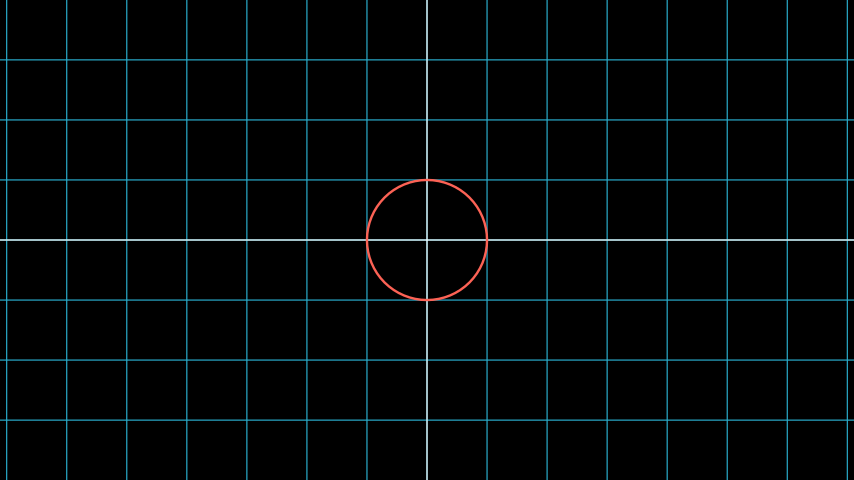

In [143]:
%%manim -ql -v WARNING MobjectPlacement

class MobjectPlacement(Scene):
    def construct(self):
        self.add(NumberPlane())

        c = Circle()
        self.add(c)